In [1]:
import pandas as pd
import pendulum

读数据

In [2]:
df = pd.read_csv('data/20230222BTC_USD_1h.csv', names=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

计算缺失的序列量

In [3]:
# UNIX Timestamp 的具体间隔
second = 60 * 1000
hour = second * 60

In [4]:
# 计算缺失的时间并存到miss变量中
t = df['timestamp'][0]
miss = []
for i in df['timestamp']:
    while i != t:
        miss.append(t)
        t += hour
    t += hour

In [5]:
len(miss)

0

In [6]:
# 缺失百分比
len(miss) / (len(df) + len(miss)) * 100

0.0

In [7]:
# 打印出缺失的时间段
for i, m in enumerate(miss):
    # print(m)
    if i == 0:
        print(f'start: {pendulum.from_timestamp(miss[i]/1000).to_datetime_string()}')
    elif i == len(miss) - 1:
        print(f'end: {pendulum.from_timestamp(miss[i]/1000).to_datetime_string()}')
    elif miss[i-1] == m - 60 * 1000 and miss[i+1] != m + 60 * 1000:
        print(f'end: {pendulum.from_timestamp(miss[i]/1000).to_datetime_string()}')
    elif miss[i-1] != m - 60 * 1000 and miss[i+1] == m + 60 * 1000:
        print(f'start: {pendulum.from_timestamp(miss[i]/1000).to_datetime_string()}')

In [8]:
# 添加自然时间增加辨识度
df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms')
# 添加当前行与上行的收盘价的变化
df['pct_change'] = df['close'].pct_change()
# 做一个偏移作为预测标签
df['label'] = df['pct_change'].shift(-1)
# 删除第一行和最后一行
df = df.iloc[1:-1]

In [9]:
df

,timestamp,open,high,low,close,volume,datetime,pct_change,label
1,1507798800000,5070.9780,5070.9780,5070.9780,5070.978000,0.000000,2017-10-12 09:00:00,0.000000,0.020801
2,1507802400000,5130.1205,5179.7700,5130.1205,5176.460203,0.013104,2017-10-12 10:00:00,0.020801,0.006752
3,1507806000000,5184.8952,5211.4120,5184.8952,5211.412000,0.008600,2017-10-12 11:00:00,0.006752,-0.008766
4,1507809600000,5165.7265,5165.7265,5165.7265,5165.726500,0.002200,2017-10-12 12:00:00,-0.008766,0.001236
5,1507813200000,5184.1490,5184.1490,5172.1095,5172.109500,0.202000,2017-10-12 13:00:00,0.001236,0.000000
...,...,...,...,...,...,...,...,...,...
47008,1677024000000,24446.9000,24469.2000,24268.1000,24417.000000,225.529214,2023-02-22 00:00:00,-0.001227,-0.009751
47009,1677027600000,24412.5000,24433.0000,24119.0000,24178.900000,320.640267,2023-02-22 01:00:00,-0.009751,-0.000219
47010,1677031200000,24178.9000,24189.7000,23869.3000,24173.600000,579.412920,2023-02-22 02:00:00,-0.000219,0.001088
47011,1677034800000,24173.7000,24262.9000,24127.4000,24199.900000,244.406198,2023-02-22 03:00:00,0.001088,-0.001810


In [10]:
# 查看1小时都没啥变动的值
df[df['pct_change']==0]

,timestamp,open,high,low,close,volume,datetime,pct_change,label
1,1507798800000,5070.9780,5070.9780,5070.9780,5070.9780,0.000000,2017-10-12 09:00:00,0.0,0.020801
6,1507816800000,5172.1095,5172.1095,5172.1095,5172.1095,0.000000,2017-10-12 14:00:00,0.0,0.024413
14,1507845600000,5305.2945,5305.2945,5305.2945,5305.2945,0.000000,2017-10-12 22:00:00,0.0,0.005304
59,1508007600000,5708.3855,5708.3855,5708.3855,5708.3855,0.000000,2017-10-14 19:00:00,0.0,-0.001996
61,1508014800000,5696.9904,5696.9904,5696.9904,5696.9904,0.000000,2017-10-14 21:00:00,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
21854,1586469600000,7310.0000,7312.6300,7286.8100,7310.0000,18.733048,2020-04-09 22:00:00,0.0,-0.003127
23183,1591254000000,9645.6200,9666.7500,9643.3300,9646.7200,19.612242,2020-06-04 07:00:00,0.0,-0.000572
44109,1666587600000,19335.6000,19354.8000,19294.3000,19336.8000,558.116052,2022-10-24 05:00:00,0.0,-0.002255
44324,1667361600000,20520.6000,20555.2000,20508.4000,20520.0000,375.852456,2022-11-02 04:00:00,0.0,-0.001574


收益分布

<AxesSubplot: ylabel='Frequency'>

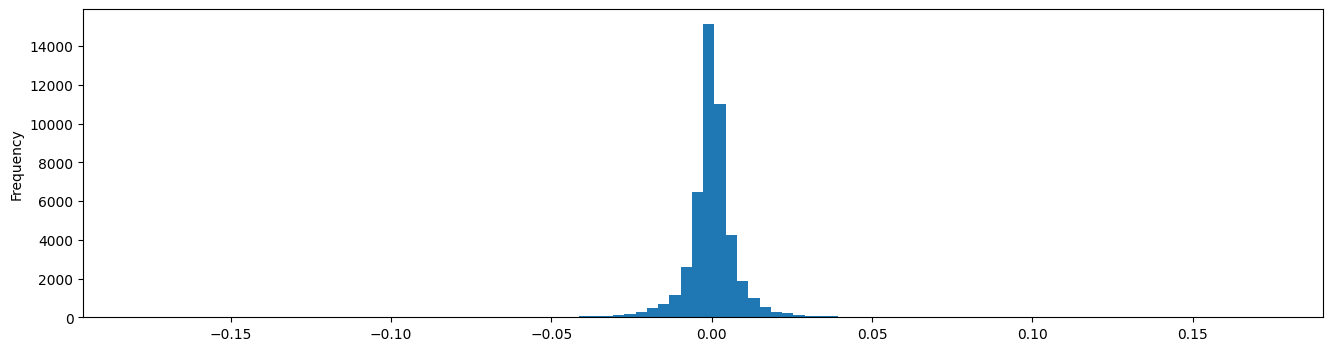

In [11]:
# 收益呈现标准差分布
df['pct_change'].plot.hist(figsize=(16, 4), bins=100)

In [12]:
len(df.loc[df['pct_change'] > 0]) / len(df) * 100

50.68067727388752

In [13]:
len(df.loc[df['pct_change'] == 0]) / len(df) * 100

0.36586403471454093

In [14]:
len(df.loc[df['pct_change'] < 0]) / len(df) * 100

48.95345869139794

删除不需要的列

In [15]:
df.drop(columns=['timestamp', 'datetime', 'pct_change'], inplace=True)

分割训练数据和测试数据

In [16]:
# 定义训练数据占比
ratio_training_data = 0.9
# 切割训练数据
l = int(len(df) * ratio_training_data)
training_data = df.head(l)
test_data = df.tail(len(df) - l)

In [17]:
len(test_data)

4702

In [18]:
training_data.to_csv('data/out_training_data.csv')
test_data.to_csv('data/out_test_data.csv')